In [1]:
import GA
import smc_abc
import smc_abc_ours
from sklearn.metrics import mean_squared_error as MSE
import numpy as np
import pyabc
import time
import matplotlib.pyplot as plt
from scipy import optimize
import pickle
from sklearn.metrics import r2_score
from scipy.stats import pearsonr

In [2]:
tag='case4'

In [14]:
def plot_scatter(true_params,ga,smcabc_ours):
    cols = list(true_params.keys())
    cols.sort()
    lim = [-2,12]
    
    plt.figure(figsize=(3,2.6))
    p_true = [true_params[col] for col in cols]
    p_est_all = []
    for item in ga.population:
        p_est = [item.genes[col] for col in cols]
        plt.scatter(p_est,p_true,color='gray',alpha=0.5,s=5)
        p_est_all.append(p_est)
    
    plt.title('MSE={:.2f}'.format(MSE(p_true,np.mean(p_est_all,axis=0))))
    plt.plot(lim,lim,'k')
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel('Estimated parameter value')
    plt.ylabel('True parameter value')
    plt.tight_layout()
    plt.savefig('../figures/{0}_ga_params.pdf'.format(tag))
    plt.show()
    '''
    df,w = smcabc_lit.history.get_distribution()
    df = df.loc[:,cols]
    p_est_all = []
    plt.figure(figsize=(3,2.6))
    for ind in df.index:
        p_est = df.loc[ind,:]
        plt.scatter(p_est,p_true,color='gray',alpha=0.5,s=5)
        p_est_all.append(p_est)
    plt.title('MSE={:.2f}'.format(MSE(p_true,np.mean(p_est_all,axis=0))))
    plt.plot(lim,lim,'k')
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel('Estimated parameter value')
    plt.ylabel('True parameter value')
    plt.tight_layout()
    plt.savefig('../figures/{0}_smcabc_classic_params.pdf'.format(tag))
    plt.show()
    '''
    p_est_all = []
    plt.figure(figsize=(3,2.6))
    for item in smcabc_ours.population:
        p_est = [item[col] for col in cols]
        plt.scatter(p_est,p_true,color='gray',alpha=0.5,s=5)
        p_est_all.append(p_est)
    plt.title('MSE={:.2f}'.format(MSE(p_true,np.mean(p_est_all,axis=0))))
    plt.plot(lim,lim,'k')
    plt.xlim(lim)
    plt.ylim(lim)
    plt.xlabel('Estimated parameter value')
    plt.ylabel('True parameter value')
    plt.tight_layout()
    plt.savefig('../figures/{0}_smcabc_this_work_params.pdf'.format(tag))
    plt.show()

### Case 

In [4]:
def linear_model(param):
 # {'p0':,'p1':,...}
    p = np.array([param['p{0}'.format(i)] for i in range(len(param))])

    res = np.dot(x_exp,np.transpose(p))

    return {'data': res}

In [5]:
def distance(x,y):
    return MSE(x['data'],y['data'])

def residual_linear_model(p):
    return y_exp['data']-linear_model({'p{0}'.format(i):p[i] for i in range(len(p))})['data']

MSE best: 87.18776966321921


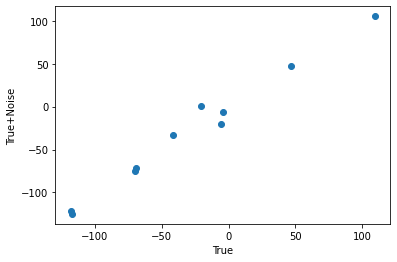

In [6]:
param_num = 100
population_size = 100
training_samples =  10
max_ite = 1000

priors1 = pyabc.Distribution(**{'p{0}'.format(i):pyabc.RV('norm',5,3) for i in range(param_num)})
priors2 = {'p{0}'.format(i):smc_abc_ours.RV('normal',5,3) for i in range(param_num)}

np.random.seed(2)
x_exp       = np.random.normal(size=(training_samples,param_num))
true_params = {'p{0}'.format(i): np.random.uniform(0,10) for i in range(param_num)}
y_true       = linear_model(true_params)
y_exp = dict()
y_exp['data']= y_true['data'] + np.random.normal(scale=10,size=training_samples)
print('MSE best:', MSE(y_exp['data'],y_true['data']))
min_dist = MSE(y_exp['data'],y_true['data'])

np.random.seed()
plt.scatter(y_true['data'],y_exp['data'])
plt.xlabel('True')
plt.ylabel('True+Noise')
plt.show()

In [7]:
#popt = fit_lr(x_exp,y_exp['data'])
#print('Leastsq:',popt)
#print('Leastsq MSE:',distance(y_exp,linear_model({'p{0}'.format(i):popt[i] for i in range(len(popt))})))


ga = GA.GA(linear_model,
     distance,
     y_exp,
     priors2,
     population_size=population_size, 
     mutation_rate=0.1,
     mutation_scale=0.1,
     max_ite=max_ite,
     min_dist=min_dist
     )
t0 = time.time()
ga.run()
print('GA time:',time.time()-t0)

t2: 1321.900664900387
t3: 1178.5912971635316
t4: 1157.719873618079
t5: 1126.082068457329
t6: 996.2191733901805
t7: 1011.3028290090529
t8: 946.1306979214972
t9: 907.4417049005156
t10: 861.9174140662842
t11: 777.3573446695744
t12: 736.8355520793424
t13: 752.6872434877018
t14: 583.1010038445695
t15: 570.1852355204537
t16: 630.7789409568202
t17: 581.6979898537465
t18: 605.7299104855907
t19: 568.1038469981086
t20: 598.0993752569789
t21: 589.7664324293053
t22: 553.6878794544186
t23: 515.9327856963124
t24: 564.1014335821571
t25: 479.4970330629719
t26: 444.50338897091086
t27: 493.91424454744185
t28: 471.3513633914168
t29: 466.78696422966567
t30: 466.78779494383855
t31: 492.7211135373625
t32: 455.1953587759347
t33: 474.67912067992137
t34: 397.812981309248
t35: 443.93398682187546
t36: 379.68550207667244
t37: 369.7504192907612
t38: 390.736719762119
t39: 394.98941405909585
t40: 388.2123634646115
t41: 332.2969958893095
t42: 305.73460483201296
t43: 315.77713894632154
t44: 310.0684328829243
t45: 303.

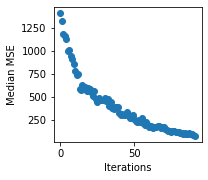

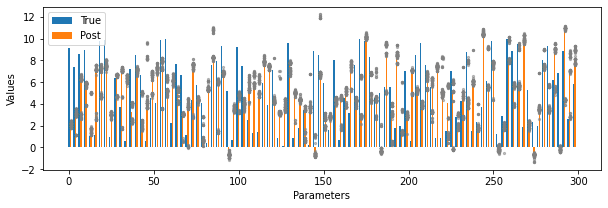

In [8]:
GA.plot_training_curve(ga,'../figures/{0}_ga.pdf'.format(tag))
GA.plot_params_bar(true_params,ga)

In [9]:
smcabc_lit = smc_abc.smc_abc(linear_model,
           distance,
           y_exp,
           priors1,
           population_size,
           min_dist=min_dist,
           max_ite=50)
t0 = time.time()
smcabc_lit.run()
print('SMC-ABC classical:',time.time()-t0)

INFO:History:Start <ABCSMC(id=31, start_time=2020-09-30 10:12:16.327907, end_time=None)>
INFO:ABC:Calibration sample before t=0.
INFO:Epsilon:initial epsilon is 1441.3494760093988
INFO:ABC:t: 0, eps: 1441.3494760093988.
INFO:ABC:Acceptance rate: 100 / 200 = 5.0000e-01, ESS=1.0000e+02.
INFO:ABC:t: 1, eps: 1095.6379832328162.
INFO:ABC:Acceptance rate: 100 / 493 = 2.0284e-01, ESS=1.0016e+00.
INFO:ABC:t: 2, eps: 888.3842815992122.


KeyboardInterrupt: 

smc_abc.plot_params_bar(smcabc_lit,true_params)
smc_abc.plot_training_curve(smcabc_lit,'../figures/{0}_smc_abc_classic.pdf'.format(tag))

In [11]:
smcabc_ours = smc_abc_ours.smc_abc_ours(linear_model,
               priors2,
               min_dist,
               population_size,
               distance_function=distance,
               Yobs=y_exp,
               max_iter=max_ite,
               cores=4,
               generation_size=population_size)

t0=time.time()
smcabc_ours.run_simulation()
print('SMC-ABC this work:',time.time()-t0)

updating population
t1: epsilon= 1539.436906586936
Updating prior
updating population
t2: epsilon= 1076.7254779005925
Updating prior
updating population
t3: epsilon= 864.9012832837118
Updating prior
updating population
t4: epsilon= 749.3220896058097
Updating prior
updating population
t5: epsilon= 628.4331527995246
Updating prior
updating population
t6: epsilon= 537.1122635623078
Updating prior
updating population
t7: epsilon= 468.89771063448313
Updating prior
updating population
t8: epsilon= 452.1210703435524
Updating prior
updating population
t9: epsilon= 404.92140147766054
Updating prior
updating population
t10: epsilon= 376.7381388861703
Updating prior
updating population
t11: epsilon= 346.1104461696642
Updating prior
updating population
t12: epsilon= 319.05709428944635
Updating prior
updating population
t13: epsilon= 299.58827945656117
Updating prior
updating population
t14: epsilon= 273.4030574589833
Updating prior
updating population
t15: epsilon= 271.3422073883636
Updating prior

updating population
t123: epsilon= 94.49388137161394
Updating prior
updating population
t124: epsilon= 93.79140478297286
Updating prior
updating population
t125: epsilon= 92.81070336971027
Updating prior
updating population
t126: epsilon= 92.38045764799136
Updating prior
updating population
t127: epsilon= 92.10453890226925
Updating prior
updating population
t128: epsilon= 92.10453890226925
Updating prior
updating population
t129: epsilon= 92.10453890226925
Updating prior
updating population
t130: epsilon= 91.72591757870094
Updating prior
updating population
t131: epsilon= 91.72591757870094
Updating prior
updating population
t132: epsilon= 91.39461835187346
Updating prior
updating population
t133: epsilon= 91.21932283997799
Updating prior
updating population
t134: epsilon= 91.21932283997799
Updating prior
updating population
t135: epsilon= 91.21932283997799
Updating prior
updating population
t136: epsilon= 89.70956766221857
Updating prior
updating population
t137: epsilon= 89.2032266232

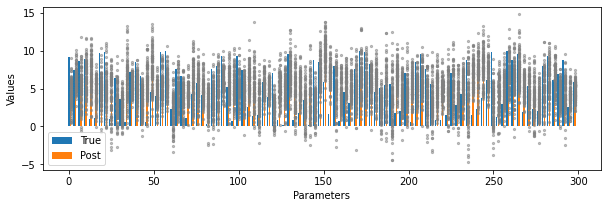

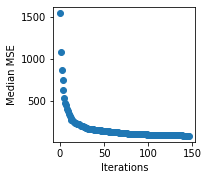

In [12]:
smc_abc_ours.plot_params_bar(true_params,smcabc_ours)
smc_abc_ours.plot_training_curve(smcabc_ours,'../figures/{0}_smc_abc_this_work.pdf'.format(tag))

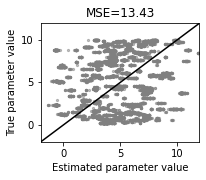

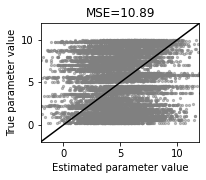

In [15]:
plot_scatter(true_params, ga,smcabc_ours )